### Objective

The goal here is to predict the Price of an Old car based on the variables provided in the data set.

In [22]:
# let's import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figureFormat='retina'
sns.set(font_scale=1.5)

In [2]:
# load the dataset
car_data = pd.read_csv(r'Training Data Set.csv')
car_data1 = car_data.copy()
car_data2 = car_data.copy()

In [4]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
Distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


The dataset contains 17 features and 53515 records.

In [5]:
car_data1.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


### Attribute Information

**Dependent variables**:       

    Id                    
    Maker                 
    model                 
    Location              
    Distance              
    Owner Type            
    manufacture_year      
    Age of car            
    engine_displacement   
    engine_power          
    body_type             
    Vroom Audit Rating    
    transmission          
    door_count            
    seat_count            
    fuel_type             
    Price                           

**Target variable**:               

    Price - price estimate for the ride in USD

### Data Type      
**Category**

    - Maker
    - Model
    - Location
    - Owner Type
    - Manufacture year
    - Body type
    - transmission           
    - door_count             
    - seat_count             
    - fuel_type      
    - vroom audit rating
    
**Continuous**       
    - Distance
    - Engine displacement
    - Engine power
    - price


### Exploratory Data Analysis

#### Univariate analysis

**Continuous**

**Distance**

In [9]:
car_data['Distance '].describe()

count    5.230400e+04
mean     9.454626e+04
std      2.755617e+05
min      0.000000e+00
25%      1.549000e+04
50%      6.552000e+04
75%      1.356410e+05
max      9.899800e+06
Name: Distance , dtype: float64

In [13]:
def calculate_mop(df, col):
    """ function to calculate and display the measures of dispersion."""
#     print(name, '\n')
    print(f'Standard deviation:     {df[col].std()}')
    print(f'Skewness:               {df[col].skew()}')
    print(f'Kurtosis:               {df[col].kurtosis()}\n')

In [14]:
calculate_mop(car_data, 'Distance ')

Standard deviation:     275561.716140559
Skewness:               23.336008239396925
Kurtosis:               632.9987196482938



Text(0.5, 1.0, 'Distribution of distance')

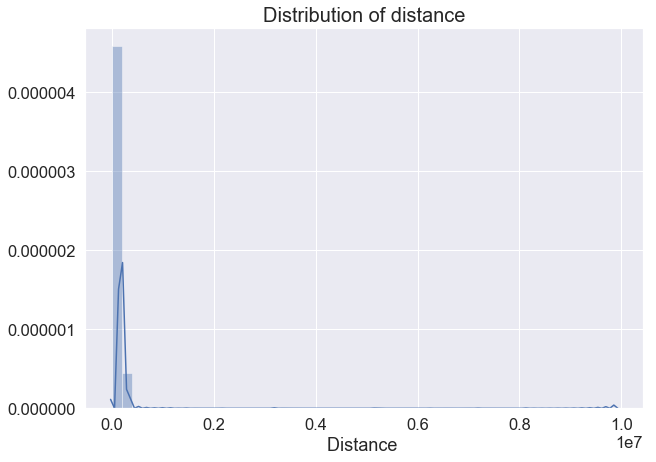

In [23]:
plt.figure(figsize=(10, 7))
sns.distplot(car_data[~car_data['Distance '].isnull()]['Distance '], kde=True)
plt.title('Distribution of distance', fontsize=20)

**Engine Displacement**

In [24]:
car_data['engine_displacement'].describe()

count    53515.000000
mean      1904.049014
std       1496.564596
min         14.000000
25%       1395.000000
50%       1896.000000
75%       1995.000000
max      32000.000000
Name: engine_displacement, dtype: float64

In [25]:
calculate_mop(car_data, 'engine_displacement')

Standard deviation:     1496.564596331696
Skewness:               12.730459629497304
Kurtosis:               210.66061063421748



Text(0.5, 1.0, 'Distribution of engine displacement')

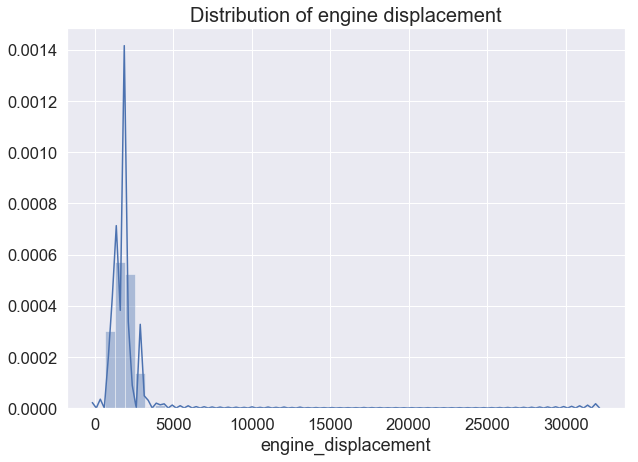

In [26]:
plt.figure(figsize=(10, 7))
sns.distplot(car_data['engine_displacement'], kde=True)
plt.title('Distribution of engine displacement', fontsize=20)

**Engine Power**

In [27]:
car_data['engine_power'].describe()

count    52076.000000
mean       100.448345
std         45.330622
min         10.000000
25%         73.000000
50%         91.000000
75%        125.000000
max        896.000000
Name: engine_power, dtype: float64

In [28]:
calculate_mop(car_data, 'engine_power')

Standard deviation:     45.33062200494428
Skewness:               1.7534979459062008
Kurtosis:               8.248068019999575



Text(0.5, 1.0, 'Distribution of Engine power')

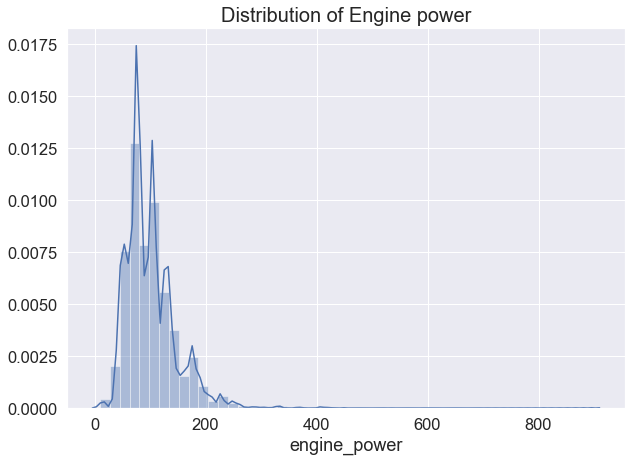

In [31]:
plt.figure(figsize=(10, 7))
sns.distplot(car_data[~car_data['engine_power'].isnull()]['engine_power'], kde=True)
plt.title('Distribution of Engine power', fontsize=20)

**Price**

In [33]:
car_data['Price'].describe()

count    5.351500e+04
mean     1.098084e+06
std      8.441565e+05
min      3.000000e+00
25%      5.051812e+05
50%      8.854552e+05
75%      1.477829e+06
max      2.212078e+07
Name: Price, dtype: float64

In [34]:
calculate_mop(car_data, 'Price')

Standard deviation:     844156.5307291836
Skewness:               2.179996513287749
Kurtosis:               14.845862494473211



Text(0.5, 1.0, 'Distribution of Price')

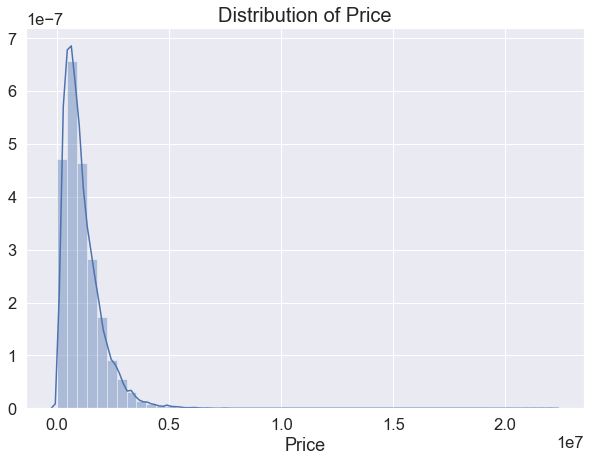

In [36]:
plt.figure(figsize=(10, 7))
sns.distplot(car_data['Price'], kde=True)
plt.title('Distribution of Price', fontsize=20)

    - Maker
    - Model
    - Location
    - Owner Type
    - Manufacture year
    - Body type
    - transmission           
    - door_count             
    - seat_count             
    - fuel_type      
    - vroom audit rating

**Categorical variables**

**Maker**

In [37]:
car_data['Maker'].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [38]:
car_data['Maker'].value_counts(normalize=True)

skoda       0.402934
toyota      0.146501
audi        0.136896
bmw         0.134131
nissan      0.102495
hyundai     0.041857
fiat        0.034476
maserati    0.000710
Name: Maker, dtype: float64

Text(0.5, 1.0, 'Frequency of Car Maker')

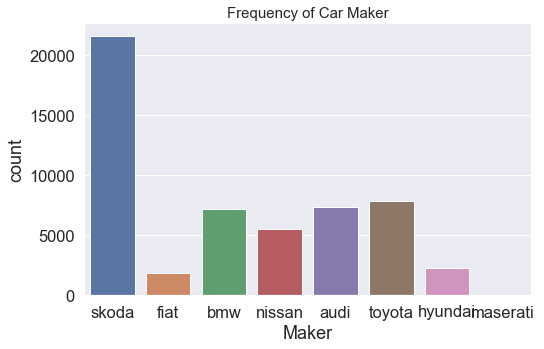

In [39]:
plt.figure(figsize=(8,5))
sns.countplot('Maker', data=car_data)
plt.title('Frequency of Car Maker', fontsize=15)

We could see that 40% of the data is for the model 'Skoda' and very few data for the car model 'Maserati'

**Model**

In [40]:
car_data['model'].value_counts()

octavia     12619
superb       3195
yaris        3176
qashqai      2854
x3           2779
x1           2420
i30          2047
q5           2039
x5           1979
yeti         1898
panda        1769
q3           1736
coupe        1710
micra        1676
auris        1666
avensis      1512
aygo         1486
rapid        1409
roomster     1322
q7           1245
citigo       1120
juke          955
tt            903
Name: model, dtype: int64

In [44]:
un_car = car_data['model'].nunique()
print(f'There are totally {un_car} unique car models in our data')

There are totally 23 unique car models in our data


In [42]:
car_data['model'].value_counts(normalize=True)

octavia     0.235803
superb      0.059703
yaris       0.059348
qashqai     0.053331
x3          0.051929
x1          0.045221
i30         0.038251
q5          0.038101
x5          0.036980
yeti        0.035467
panda       0.033056
q3          0.032440
coupe       0.031954
micra       0.031318
auris       0.031131
avensis     0.028254
aygo        0.027768
rapid       0.026329
roomster    0.024703
q7          0.023265
citigo      0.020929
juke        0.017845
tt          0.016874
Name: model, dtype: float64

We could see that 23% of the data contains the model 'Octavia' and the remaining are more or less similar.            
The german car maker Audi model TT has low number of data.

#### Missing values

In [5]:
car_data1.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

We have missing values in the features 'Distance', 'Engine power', 'Body type'.             
And the columns door_count and seat_count needs to be converted to numerical data type.

Since body_type feature has more than 75% data missing, we will ignore that column. Also, we can ignore the Id column.
For Distance and engine power columns, we will impute with the appropriate value.     
since we have the age of the car, we can safely ignore the redundant manufacture_year column

In [6]:
# let's drop those 3 columns
car_data1 = car_data1.drop(['body_type', 'Id', 'manufacture_year'], axis='columns')

In [7]:
# let's check the unique models in our dataset
car_data1['model'].unique()

array(['octavia', 'panda', 'x1', 'juke', 'x5', 'superb', 'qashqai',
       'coupe', 'micra', 'aygo', 'yeti', 'auris', 'q3', 'q5', 'x3',
       'avensis', 'i30', 'q7', 'tt', 'citigo', 'yaris', 'roomster',
       'rapid'], dtype=object)

In [8]:
car_data1[car_data1['Distance '].isnull()]['model'].nunique() # number of unique elements in car models

22

**Distance**

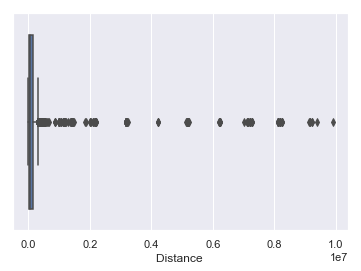

In [9]:
sns.boxplot(car_data1['Distance '])

We could see that, there are lot of outliers. Let's check the data.

In [18]:
car_data1[car_data1['Distance '] > 8000000].head(5)

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
1053,skoda,octavia,Kolkata,8177000.0,First,11,2000,110.0,5,man,None,None,petrol,249815.25
5923,skoda,superb,Pune,9235000.0,First,10,9235,NaN,7,auto,None,None,petrol,680052.00
5982,skoda,octavia,Coimbatore,8177000.0,Fourth & Above,11,2000,110.0,4,man,None,None,petrol,249815.25
8414,skoda,octavia,Mumbai,8179000.0,First,17,1900,81.0,4,man,None,None,petrol,235936.50
11206,skoda,octavia,Jaipur,8177000.0,First,11,2000,110.0,7,man,None,None,petrol,249815.25


We could see that, it is due to either age of car and the owner type is first, these are important data, hence, we cannot 
ignore these records.

**Engine Power**

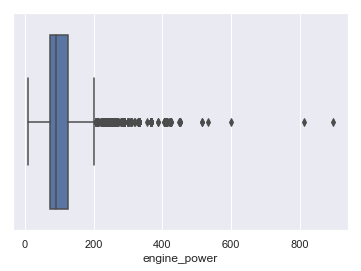

In [410]:
sns.boxplot(car_data1['engine_power'])

In [19]:
car_data1[car_data1['engine_power'] > 250].head(5)

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
47,bmw,x5,Ahmedabad,160000.0,Fourth & Above,13,4799,265.0,4,auto,4,5,petrol,862916.25
60,bmw,x5,Ahmedabad,42000.0,Second,7,4395,408.0,4,auto,4,5,petrol,3149872.50
136,bmw,x5,Ahmedabad,38000.0,Fourth & Above,5,4395,330.0,5,auto,None,5,petrol,5626665.75
304,audi,q7,Coimbatore,150000.0,Third,10,5934,412.0,7,auto,4,5,diesel,2487521.25
377,audi,coupe,Ahmedabad,53600.0,Fourth & Above,6,2480,265.0,7,man,2,4,petrol,2771661.00


These are high-end cars, as it is evident from the "Maker" column. These records are important as well.

**Missing value imputation**

Since the median value is not affected by outliers. Let's impute the columns with 
missing values with median, for now.

In [20]:
# let's impute the distance column with median value
dist_median = np.median(car_data1[~car_data1['Distance '].isnull()]['Distance '])
car_data1['Distance '].fillna(dist_median, inplace=True)
car_data1['Distance '] = car_data1['Distance '].astype('float')

In [21]:
# let's impute the engine power column with median value
pwr_median = np.median(car_data1[~car_data1['engine_power'].isnull()]['engine_power'])
car_data1['engine_power'].fillna(pwr_median, inplace=True)

In [22]:
car_data1.isnull().sum().sum()

0

Now, we have no null values in our data.

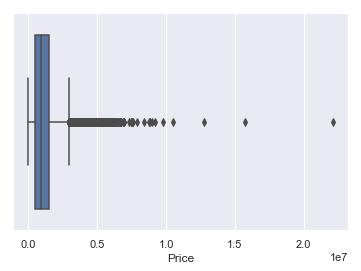

In [414]:
# let's check for outliers in our target price column
sns.boxplot(car_data1['Price'])

We see a lot of outliers, in our response variable. Let's check analyse further.

In [23]:
# let's get the summary statistics for the target column

q1 = car_data1['Price'].quantile(0.25)
q3 = car_data1['Price'].quantile(0.75)
iqr = q3 -q1
uw = q3 + 1.5*iqr
uw

2936800.3125

In [24]:
car_data1[car_data1['Price'] > uw].head() # let's check the outlier values

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
4,bmw,x5,Jaipur,59524.0,Fourth & Above,7,2993,180.0,7,auto,4,5,diesel,3085561.50
17,audi,coupe,Ahmedabad,1100.0,Third,4,2967,180.0,7,auto,2,4,diesel,4537797.00
30,audi,q3,Mumbai,1000.0,Second,4,1968,135.0,7,auto,4,5,diesel,3556973.25
60,bmw,x5,Ahmedabad,42000.0,Second,7,4395,408.0,4,auto,4,5,petrol,3149872.50
69,bmw,x3,Delhi,10.0,Fourth & Above,4,1995,10.0,5,auto,None,5,diesel,2972503.50


In [417]:
car_data1[car_data1['Price'] > uw]['Maker'].unique()

array(['bmw', 'audi', 'skoda', 'toyota', 'fiat'], dtype=object)

We could see that, the models where the price of the cars lie above approx 30 lakhs, are higher end models.

In [418]:
# let's check for correlations of the features with the price columns
# sns.pairplot(car_data1, diag_kind='kde')

In [419]:
corr_m = car_data1.corr()
corr_m['Price'].abs().sort_values(ascending=False)[1:]

engine_power           0.620668
Age of car             0.506707
engine_displacement    0.162072
Distance               0.155366
Vroom Audit Rating     0.005109
Name: Price, dtype: float64

We could see that, engine power has moderately positive correlatio with the price column.

Let's check the number of unique values in the categorical columns.

In [30]:
cat_columns = list(car_data1.select_dtypes(exclude=np.number))

In [31]:
# let's check the nummber of unique elements in categorical columns
for col in cat_columns:
    print(col, ':', car_data1[col].unique())
    print(col, ':',car_data1[col].nunique(), '\n')

Maker : ['skoda' 'fiat' 'bmw' 'nissan' 'audi' 'toyota' 'hyundai' 'maserati']
Maker : 8 

model : ['octavia' 'panda' 'x1' 'juke' 'x5' 'superb' 'qashqai' 'coupe' 'micra'
 'aygo' 'yeti' 'auris' 'q3' 'q5' 'x3' 'avensis' 'i30' 'q7' 'tt' 'citigo'
 'yaris' 'roomster' 'rapid']
model : 23 

Location : ['Ahmedabad' 'Hyderabad' 'Mumbai' 'Jaipur' 'Chennai' 'Coimbatore' 'Kochi'
 'Bangalore' 'Pune' 'Kolkata' 'Delhi']
Location : 11 

Owner Type : ['Second' 'Third' 'Fourth & Above' 'First']
Owner Type : 4 

transmission : ['man' 'auto']
transmission : 2 

door_count : ['None' '4' '5' '2' '3' '1' '6']
door_count : 7 

seat_count : ['None' '4' '5' '2' '3' '7' '6' '1' '9' '8']
seat_count : 10 

fuel_type : ['petrol' 'diesel']
fuel_type : 2 



We could see that, there are 'None' values in door_count and seat_count columns. 
And some interesting values like 1 in door count and seat count of a car. Let's check those records.

Let's check how many records has None values.

In [425]:
len(car_data1[car_data1['door_count']=='None'])

7534

In [426]:
len(car_data1[car_data1['seat_count']=='None'])

8511

In [33]:
car_data1[car_data1['door_count']=='1']

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
11862,audi,q7,Jaipur,17282.0,Second,4,2967,200.0,5,auto,1,None,diesel,5770725.75
12051,skoda,roomster,Mumbai,4769.0,Fourth & Above,5,1197,63.0,6,man,1,None,petrol,763323.75


In [427]:
car_data1['seat_count'] = car_data1['seat_count'].replace('None', 4)
car_data1['door_count'] = car_data1['door_count'].replace('None', 4)
car_data1['seat_count'] = car_data1['seat_count'].astype('int64')
car_data1['door_count'] = car_data1['seat_count'].astype('int64')

In [428]:
dic = {'Second':2, 'Third':3, 'Fourth & Above':4, 'First':1}
car_data1['Owner Type'] = car_data1['Owner Type'].replace(dic)
car_data1['Owner Type'] = car_data1['Owner Type'].astype('int64')

In [429]:
car_data1['Maker'].head(15)

0      skoda
1       fiat
2        bmw
3     nissan
4        bmw
5      skoda
6      skoda
7       fiat
8     nissan
9      skoda
10     skoda
11      audi
12    nissan
13    toyota
14     skoda
Name: Maker, dtype: object

#### Handling Categorical features

In [ ]:
# let's encode the categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

lb = LabelBinarizer()
car_data1['transmission'] = lb.fit_transform(car_data1['transmission'])
car_data1['fuel_type'] = lb.fit_transform(car_data1['fuel_type'])

In [430]:
makers = pd.DataFrame(lb.fit_transform(car_data1['Maker']), 
                      columns=['audi', 'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota'])

In [431]:
lb.fit_transform(car_data1['model'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [432]:
car_data1.drop('Maker', axis='columns', inplace=True)

In [433]:
car_data1 = pd.concat([car_data1, makers], axis='columns')

In [434]:
X = car_data1.drop(['model', 'Location', 'Price'], axis='columns')
y = car_data1['Price'].copy()

In [435]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40136, 18), (13379, 18), (40136,), (13379,))

### Model building

In [436]:
import statsmodels.api as sm

x_constant = sm.add_constant(X)
base_model = sm.OLS(y, x_constant).fit()
base_model.summary()

C:\Users\gokul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     8349.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:14:27   Log-Likelihood:            -7.7271e+05
No. Observations:               53515   AIC:                         1.545e+06
Df Residuals:                   53498   BIC:                         1.546e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.002e+06    2.1e+04     47.646      0.000    9.61e+05    1.04e+06
Distance               -0.1576      0.007    -21.310      0.000      -0.172      -0.143
Owner Type          -3537.0823   1745.878     -2.026      0.043   -6959.017    -115.148
Age of car          -7.844e+04    442.488   -177.280      0.000   -7.93e+04   -7.76e+04
engine_displacement     5.3550      1.398      3.830      0.000       2.615       8.095
engine_power         5401.8592     64.762     83.411      0.000    5274.926    5528.793
Vroom Audit Rating   1346.5925   1376.217      0.978      0.328   -1350.805    4043.990
transmission        -2.423e+05   5057.762    -47.908      0.000   -2.52e+05   -2.32e+05
door_count           4.006e+04   1734.493     23.098      0.000    3.67e+04    4.35e+04
seat_count           4.006e+04   1734.493     23.098      0.000    3.67e+04    4.35e+04
fuel_type           -8.955e+04   4433.162    -20.200      0.000   -9.82e+04   -8.09e+04
audi                 6.647e+05   1.01e+04     65.557      0.000    6.45e+05    6.85e+05
bmw                  3.656e+05   1.03e+04     35.389      0.000    3.45e+05    3.86e+05
fiat                -5.794e+04   1.31e+04     -4.424      0.000   -8.36e+04   -3.23e+04
hyundai             -2.328e+05   1.24e+04    -18.754      0.000   -2.57e+05   -2.08e+05
maserati             5.449e+05   6.62e+04      8.230      0.000    4.15e+05    6.75e+05
nissan              -4.142e+04   1.07e+04     -3.859      0.000   -6.25e+04   -2.04e+04
skoda               -9.996e+04   9276.438    -10.775      0.000   -1.18e+05   -8.18e+04
toyota               -1.41e+05   1.02e+04    -13.867      0.000   -1.61e+05   -1.21e+05
==============================================================================
Omnibus:                    60204.694   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33739484.330
Skew:                           5.166   Prob(JB):                         0.00
Kurtosis:                     125.574   Cond. No.                     5.93e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We got a decent score of 71% for our base model.   
And, we could see that Vroom audit rating feature is insignificant and Owner type feature is less signficant in presence
of other variables for 95% confidence interval.      
Let's see, if we could improve upon this score, using other models.

### Evaluation Metric

The predicted Price for each car in the Test dataset will be compared with the actual Price to calculate the **RMSE** value of the entire prediction. The lower the RMSE value, the better the model will be.

### Linear Regression

In [437]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [438]:
lr_predicted = lr.predict(X_test)

In [439]:
# evaluation
from sklearn.metrics import mean_squared_error, accuracy_score

rmse = np.sqrt(mean_squared_error(y_test, lr_predicted))
rmse

436369.63769722544

**RMSE for Linear regression** 436369.63769

In [441]:
models = pd.DataFrame(lb.fit_transform(car_data1['model']), 
                      columns=model_cols)
car_data1.drop('model', axis='columns', inplace=True)

In [442]:
X1 = pd.concat([car_data1, models], axis='columns')
X1 = car_data1.drop(['Location', 'Price'], axis='columns')

In [443]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.25, random_state=42)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((40136, 18), (13379, 18), (40136,), (13379,))

In [444]:
lr1 = LinearRegression()
lr1_model = lr1.fit(X_train1, y_train1)

In [445]:
lr1_predicted = lr1.predict(X_test1)

In [446]:
rmse = np.sqrt(mean_squared_error(y_test1, lr1_predicted))
rmse

436369.63769722544

#### Random Forest Regressor

In [447]:
from sklearn.ensemble import RandomForestRegressor

In [448]:
rf = RandomForestRegressor(random_state=42)
rf_model = rf.fit(X_train, y_train)

C:\Users\gokul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [449]:
rf_predicted = rf.predict(X_test)

In [450]:
train_err = rf.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, train_err))
rmse

106296.37679748329

In [451]:
rmse = np.sqrt(mean_squared_error(y_test, rf_predicted))
rmse

231469.94310904856

**RMSE for Randor Forest regression** 231469.943

In [466]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {}


clf = RandomizedSearchCV(rf, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2)
clf.fit(X_train, y_train)

In [ ]:
rs = RandomizedSearchCV()

In [452]:
rf1 = RandomForestRegressor(random_state=42)
rf1_model = rf.fit(X_train1, y_train1)

In [453]:
rf1_predicted = rf.predict(X_test1)

In [454]:
rmse = np.sqrt(mean_squared_error(y_test1, rf1_predicted))
rmse

231469.94310904856

#### Gradient Boosting Regressor

In [455]:
from sklearn.ensemble import GradientBoostingRegressor

In [456]:
gb = GradientBoostingRegressor(random_state=42)
gb_model = gb.fit(X_train, y_train)

In [457]:
gb_predicted = gb.predict(X_test)

In [458]:
rmse = np.sqrt(mean_squared_error(y_test, gb_predicted))
rmse

234477.9803151883

**RMSE for Gradient Boosting regressor** 231469.943

#### XG Boost Regressor

In [459]:
from xgboost import XGBRegressor

In [460]:
xgr = XGBRegressor(random_state=42)
xgr.fit(X_train, y_train)

C:\Users\gokul\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [461]:
xgb_predicted = xgr.predict(X_test)

In [462]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_predicted))
rmse

235703.07785217572

**RMSE for XG Boost regressor** 231469.943

### Test data prediction

In [464]:
testing_data = pd.read_csv(r'Test Data Set.csv')

In [469]:
testing_data = testing_data.drop(['body_type', 'Id', 'manufacture_year'], axis='columns')

In [470]:
pdist_median = np.median(testing_data[~testing_data['Distance '].isnull()]['Distance '])
testing_data['Distance '].fillna(pdist_median, inplace=True)
testing_data['Distance '] = testing_data['Distance '].astype('float')

In [471]:
pqwr_median = np.median(testing_data[~testing_data['engine_power'].isnull()]['engine_power'])
testing_data['engine_power'].fillna(pqwr_median, inplace=True)

In [472]:
testing_data['transmission'] = lb.fit_transform(testing_data['transmission'])
testing_data['fuel_type'] = lb.fit_transform(testing_data['fuel_type'])

In [473]:
testing_data['seat_count'] = testing_data['seat_count'].replace('None', 4)
testing_data['door_count'] = testing_data['door_count'].replace('None', 4)
testing_data['seat_count'] = testing_data['seat_count'].astype('int64')
testing_data['door_count'] = testing_data['seat_count'].astype('int64')

In [474]:
dic = {'Second':2, 'Third':3, 'Fourth & Above':4, 'First':1}
testing_data['Owner Type'] = testing_data['Owner Type'].replace(dic)
testing_data['Owner Type'] = testing_data['Owner Type'].astype('int64')

In [475]:
makers = pd.DataFrame(lb.fit_transform(testing_data['Maker']), 
                      columns=['audi', 'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota'])

In [476]:
testing_data.drop('Maker', axis='columns', inplace=True)
testing_data = pd.concat([testing_data, makers], axis='columns')


In [479]:
X_train_tst = testing_data.drop(['model', 'Location'], axis='columns')

In [481]:
pr = rf.predict(X_train_tst)

In [482]:
np.savetxt('result.csv', pr, delimiter=',')